### Import of libraries we are going to use

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.datasets import load_iris


### Import of csv data

In [2]:
hashed_df = pd.read_csv('hashed_data.csv')
tabular_df = pd.read_csv('tabular_data.csv')
train_df = pd.read_csv('train_target.csv')
test_df = pd.read_csv('test_target.csv')
train_df.head(5)

,ID,TARGET
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### Simple way to remove NaN values, proly too simple ...
#### My though process: 
Since we were not given details about meaning of the colums, it can be assumed that colums with ones and zeroes are some kind of categorical data. So it would be better to replace NaNs on on those columns with lets say 2, so it can have some meaning. Then, when those NaN gaps are filled we can start cleaning other NaN datapoints. I believe it will be more optimal (compared to just <b><i>fillna bfill </i></b> method) to build a linear regression model based on other existing data and make predictions of this values based on that model. But here its done with the simplest solution.

In [3]:
tabular_df = tabular_df.fillna(axis='columns', method='bfill')    

### Apply PCA to group table on PERIODs to reduce dimensionality

In [4]:
tabular_df_groupped = tabular_df.groupby('ID').agg(lambda x: list(x))
tabular_df_groupped.head(3)

,PERIOD,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,...,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
ID,,,,,,,,,,,,,,,,,,,,,
1.0,"[1.0, 2.0, 3.0]","[27.0, 19.0, 22.0]","[0.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.0, 1.0, 0.0]","[0.0, 0.0, 0.0]","[27.0, 19.0, 0.0]",...,"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 46.59]","[45.53, 48.0, 46.59]","[1.055, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[45.53, 48.0, 46.59]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
2.0,"[1.0, 2.0, 3.0]","[0.0, 28.0, 27.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",...,"[9.0, 0.0, 5.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[157.5, 157.5, 0.82]","[3.3075, 3.64, 0.82]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[157.5, 157.5, 157.5]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
3.0,"[1.0, 2.0, 3.0]","[26.0, 26.0, 28.0]","[18.0, 19.0, 23.0]","[3.0, 5.0, 2.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.0, 0.0, 0.0]","[1.0, 1.0, 1.0]","[1.0, 1.0, 1.0]","[0.0, 1.0, 0.0]",...,"[12.0, 16.0, 15.0]","[1.0, 0.0, 0.0]","[0.0, 0.0, 289.47]","[191.0, 7.165, 289.47]","[2.24793237166667, 7.165, 192.389279998375]","[17.0, 18.0, 22.0]","[2637.616991, 2262.164415, 1657.20002]","[191.0, 237.94, 289.47]","[4.0, 0.0, 2.0]","[0.432804, 0.0, 39.613288]"


In [8]:
tabular_df_groupped = tabular_df_groupped.drop(['PERIOD'], axis=1)
tabular_df_arr = tabular_df_groupped_2.to_numpy()

In [12]:
tabular_df_arr

array([[list([27.0, 19.0, 22.0]), list([0.0, 0.0, 0.0]),
        list([0.0, 1.0, 0.0]), ..., list([45.53, 48.0, 46.59]),
        list([0.0, 0.0, 0.0]), list([0.0, 0.0, 0.0])],
       [list([0.0, 28.0, 27.0]), list([0.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0]), ..., list([157.5, 157.5, 157.5]),
        list([0.0, 0.0, 0.0]), list([0.0, 0.0, 0.0])],
       [list([26.0, 26.0, 28.0]), list([18.0, 19.0, 23.0]),
        list([3.0, 5.0, 2.0]), ..., list([191.0, 237.94, 289.47]),
        list([4.0, 0.0, 2.0]), list([0.432804, 0.0, 39.613288])],
       ...,
       [list([28.0, 11.0, 31.0]), list([9.0, 7.0, 5.0]),
        list([1.0, 3.0, 1.0]), ..., list([26.35, 98.0, 88.94]),
        list([0.0, 2.0, 1.0]),
        list([0.0, 223.351738, 7.8163490000000015])],
       [list([13.0, 0.0, 1.0]), list([27.0, 0.0, 0.0]),
        list([0.0, 0.0, 0.0]), ..., list([10.93, 0.0, 0.0]),
        list([0.0, 0.0, 0.0]), list([0.0, 0.0, 0.0])],
       [list([28.0, 30.0, 29.0]), list([0.0, 6.0, 12.0]),
       

In [23]:
print(tabular_df_groupped.iloc[1]['V_1'])

[0.0, 28.0, 27.0]


In [13]:
X = tabular_df_groupped.iloc[1]
pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)

ValueError: setting an array element with a sequence.

### Find mean values of three PERIODs based on ID to reduce dimensionality

In [5]:
tabular_df

,PERIOD,ID,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_34,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43
0,1.0,1.0,27.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00,45.53,1.0550,0.0,0.0,45.53,0.0,0.0
1,2.0,1.0,19.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.00,48.00,0.0000,0.0,0.0,48.00,0.0,0.0
2,3.0,1.0,22.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,46.59,46.59,0.0000,0.0,0.0,46.59,0.0,0.0
3,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,9.0,0.0,0.00,157.50,3.3075,0.0,0.0,157.50,0.0,0.0
4,2.0,2.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.00,157.50,3.6400,0.0,0.0,157.50,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14576,2.0,4870.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.00,0.00,0.9150,0.0,0.0,0.00,0.0,0.0
14577,3.0,4870.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.00,0.00,0.1150,0.0,0.0,0.00,0.0,0.0
14578,1.0,4871.0,28.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.00,30.00,0.0000,0.0,0.0,30.00,0.0,0.0
14579,2.0,4871.0,30.0,6.0,0.0,1.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.00,30.00,0.1300,0.0,0.0,30.00,0.0,0.0


In [4]:
tabular_df_means = tabular_df.groupby([tabular_df['ID']]).mean()
tabular_df_means.reset_index(level=0, inplace=True)

### Building logistic regression model to solve the task

In [6]:
df_train = pd.merge(tabular_df_means, train_df, on='ID')

# split train into train/test to test our model (coz we don't have correct answer in our test dataset - its empty and supposed to filled by us and sent for review)
df_train, df_test = train_test_split(df_train, test_size=0.2) 

y = df_train.TARGET
X = df_train.drop(['PERIOD', 'ID', 'TARGET'], axis=1).fillna(method='bfill')

model = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(X, y)
model.score(X, y)

0.7296511627906976

In [7]:
df_test.head()

,ID,PERIOD,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,...,V_35,V_36,V_37,V_38,V_39,V_40,V_41,V_42,V_43,TARGET
3436,3437.0,2.0,26.333333,7.000000,1.000000,1.0,1.000000,0.0,0.666667,0.666667,...,0.000000,0.000000,56.666667,0.170833,6.333333,73.412431,38.000000,0.000000,0.000000,0
2944,2945.0,2.0,30.000000,30.333333,0.666667,1.0,0.666667,0.0,0.333333,0.666667,...,0.333333,0.823367,47.156700,2.002533,30.333333,760.623929,53.333333,27.666667,1440.417665,1
3627,3628.0,2.0,30.666667,22.666667,0.333333,1.0,1.000000,0.0,0.333333,1.000000,...,0.000000,0.000000,35.666667,1.206778,375.591944,1305.742241,35.666667,0.000000,0.000000,1
1430,1431.0,2.0,20.666667,0.000000,0.333333,1.0,0.333333,0.0,0.000000,0.000000,...,0.000000,0.000000,30.039167,0.076667,0.000000,0.000000,45.000000,0.000000,0.000000,1
1485,1486.0,2.0,10.000000,0.000000,0.333333,1.0,0.666667,0.0,0.333333,0.000000,...,0.000000,0.000000,27.915000,0.400000,0.000000,0.000000,55.993333,0.000000,0.000000,0


In [8]:
# test_df_n = pd.merge(tabular_df_means, test_df, on='ID')

X_pred = df_test.drop(['PERIOD', 'ID', 'TARGET'], axis=1).fillna(method='bfill')

res = model.predict_proba(X_pred)[:,1]

In [9]:
# calc ROC AUC score for Logistic Regression
y_true = df_test['TARGET']
y_scores = res
roc_auc_score(y_true, y_scores)

0.6589361734827179

In [10]:
# SVM classifier
X = df_train.drop(['PERIOD', 'ID', 'TARGET'], axis=1).fillna(method='bfill')
y = df_train.TARGET
model_SVC = SVC(kernel = 'rbf', random_state = 3).fit(X, y)

y_pred_svm = model_SVC.decision_function(X_pred)

In [15]:
# Calc ROC and AUC for Logistic Regr
logistic_fpr, logistic_tpr, threshold = roc_curve(y_true, y_scores)
auc_logistic = auc(logistic_fpr, logistic_tpr)

# Calc ROC and AUC for SVM
svm_fpr, svm_tpr, threshold = roc_curve(y_true, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

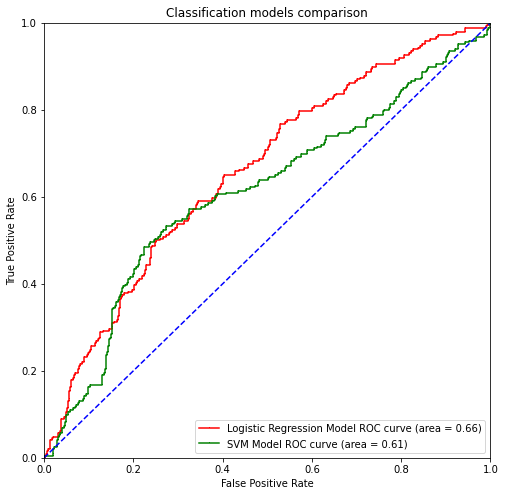

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(logistic_fpr, logistic_tpr, marker=',', color='red', label='Logistic Regression Model ROC curve (area = %0.2f)' % auc_logistic)
plt.plot(svm_fpr, svm_tpr, marker=',', color='green', label='SVM Model ROC curve (area = %0.2f)' % auc_svm)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification models comparison')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

In [15]:
test_df.to_csv('HaidaTarasMonkaS_test.txt', sep=',', index=False)